<h1 style='
    font-weight:700; 
    font-size:40px;
    font-family:"Segoe UI Light";
    letter-spacing:0.5px;
    margin-bottom: 10px;
  '>United Kingdom Accident Data Analysis
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<h1 style='
    font-weight:500; 
    font-size:30px;
    letter-spacing:1px;
    font-family:"Segoe UI Light";
    margin-top: 10px;
    '>Inclusive Years 2019 - 2022
</h1>
<h1 style='
    padding-bottom:1em;
    font-weight:500; 
    font-size:20px;
    letter-spacing:1px;
    font-family:"Segoe UI Light";
    '>Analyst: Sinaon, Gail Ivan Y.
</h1>

<h1 style='
    font-weight:700;
    font-size:40px;
    color:#597165;
    letter-spacing:0.5px;
    font-family:"Segoe UI Light";
    margin-bottom: 20px;
    '>Data Preperations
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<h1 style='
    margin-top: 10px;
    position: relative;
    font-weight:500;
    font-size:30px;
    font-family:"Segoe UI Light";
    letter-spacing:1px;
    '>Importing libraries
</h1>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

<h1 style='font-weight:500;
    font-size:30px;
    font-family:"Segoe UI Light";
    letter-spacing:1px;
    '>Importing Data Frame
</h1>

In [2]:
accidents = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accidents.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


In [4]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [5]:
accidents.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Data Cleansing:
    </span> 
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 10px;
    font-family: "Segoe UI Light";
    line-spacing: 1px;
    '>
    Identifying null values and filling null values 
</h1>

In [6]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [7]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mode()[0])
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mode()[0])
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                       0
Light_Conditions               0
District Area                  0
Longitude                      0
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [9]:
# accidents['Accident Date'] = accidents['Accident Date'].fillna(accidents['Accident Date']) == 'Unknown Date'
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna('Unknown')
accidents['Road_Type'] = accidents['Road_Type'].fillna('Unknown')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna('Unknown')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna('Unknown')

In [10]:
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [11]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660679 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660679 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  660679 non-null  object 
 10  Road_Type                660679 non-null  object 
 11  Urban_or_Rural_Area      660679 non-null  object 
 12  Weather_Conditions       660679 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1 style='
    font-weight:600;
    font-size:40px;
    font-family:"Segoe UI Light";
    letter-spacing: 1px;
    margin-bottom: 20px;
    '>
    <span style='color:#597165;'>
        Data Preparation:
    </span>
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<h1 style='
    margin-top: 10px;
    font-weight:500;
    font-size:30px;
    font-family:"Segoe UI Light";
    letter-spacing: 1px;
    '>
    Converting Date Fields into Date Time datatypes
</h1>


In [12]:
accidents['Accident Date'] = accidents['Accident Date'].astype('str')
accidents['Accident Date'] = accidents['Accident Date'].str.strip()
accidents['Accident Date'] = accidents['Accident Date'].str.replace('/', '-')

In [13]:
accidents['Accident Date'] = pd.to_datetime(accidents['Accident Date'], dayfirst = True, errors = 'coerce')

In [14]:
accidents.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

In [15]:
accidents['Accident Date'].unique()

<DatetimeArray>
['2019-06-05 00:00:00', '2019-07-02 00:00:00', '2019-08-26 00:00:00',
 '2019-08-16 00:00:00', '2019-09-03 00:00:00', '2019-09-18 00:00:00',
 '2019-09-05 00:00:00', '2019-10-03 00:00:00', '2019-10-31 00:00:00',
 '2019-10-18 00:00:00',
 ...
 '2022-09-13 00:00:00', '2022-10-31 00:00:00', '2022-11-21 00:00:00',
 '2022-12-02 00:00:00', '2022-12-18 00:00:00', '2022-12-29 00:00:00',
 '2022-12-30 00:00:00', '2022-12-26 00:00:00', '2022-07-25 00:00:00',
 '2022-12-25 00:00:00']
Length: 1461, dtype: datetime64[ns]

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Data Preparation:
    </span> 
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 10px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    Converting all data types to its corresponding data type
</h1>

In [16]:
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District Area'] = accidents['District Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')

In [17]:
accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [18]:
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Data Aggregation:
    </span> 
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 10px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    Correlating columns and analyzing data
</h1>

In [19]:
accidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [20]:
accidents.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Unknown,Urban,Unknown,Taxi/Private hire car
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Unknown,Urban,Unknown,Other vehicle


In [21]:
accidents.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Insights No.
    </span> 
    1 - 2
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>What district has the most fatal accidents?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Birmingham District has the most fatal accidents with 105 fatal accidents or roughly 1.21% of the recorded accidents.
        </span>
    </li>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Harlow, Stevenage, and Clackmannanshire District has only 1 fatal accident recorded.
        </span>
    </li>
</ol>

In [22]:
# filter the accidents by severity
fatal_accidents = accidents[accidents['Accident_Severity'] == 'Fatal']
fatal_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
7,200701BS67370,Fatal,2019-10-03,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car
11,200701BS67747,Fatal,2019-11-02,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
20,200701BS68301,Fatal,2019-10-24,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car
21,200701BS68302,Fatal,2019-11-24,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car
717,200701CP00032,Fatal,2019-01-30,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,2022-01-29,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car
660519,201091NJ01533,Fatal,2022-02-02,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car
660565,201091NJ11329,Fatal,2022-08-15,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over
660581,201091NJ14695,Fatal,2022-10-21,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car


In [23]:
# group them by district area
fatal_district_area = fatal_accidents.groupby('District Area').size()
fatal_district_area.sort_values(ascending=False)

C:\Users\LAB4-StudentPC38\AppData\Local\Temp\ipykernel_4036\2596405067.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fatal_district_area = fatal_accidents.groupby('District Area').size()


District Area
Birmingham                  105
Leeds                        93
Highland                     88
East Riding of Yorkshire     85
Bradford                     71
                           ... 
Orkney Islands                2
Havant                        2
Stevenage                     1
Clackmannanshire              1
Harlow                        1
Length: 422, dtype: int64

In [24]:
accidents['District Area'].unique

<bound method Series.unique of 0         Kensington and Chelsea
1         Kensington and Chelsea
2         Kensington and Chelsea
3         Kensington and Chelsea
4         Kensington and Chelsea
                   ...          
660674                  Highland
660675                  Highland
660676                  Highland
660677                  Highland
660678                  Highland
Name: District Area, Length: 660679, dtype: category
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']>

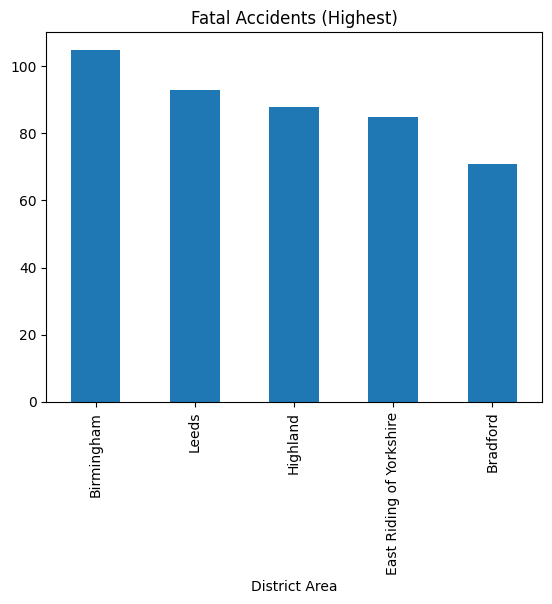

In [25]:
fatal_district_area_counts = fatal_district_area.sort_values(ascending=False).head()
fatal_district_area_counts.plot(kind='bar')
plt.title('Fatal Accidents (Highest)')

plt.show()

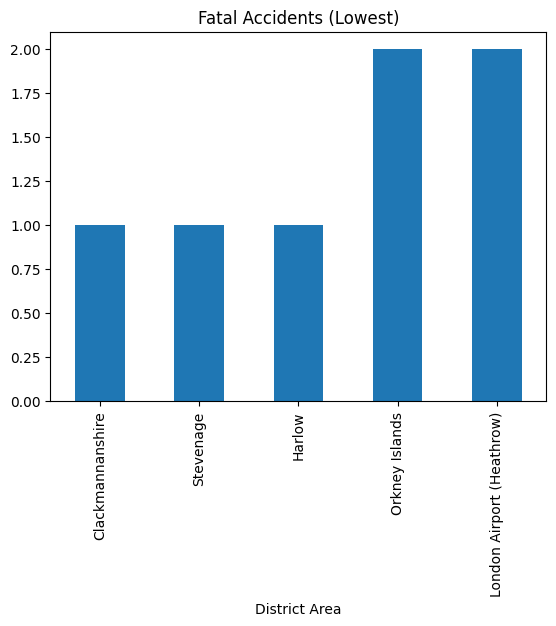

In [26]:
fatal_district_area_counts = fatal_district_area.sort_values(ascending=True).head()
fatal_district_area_counts.plot(kind='bar')
plt.title('Fatal Accidents (Lowest)')

plt.show()

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Insights No.
    </span> 
    3 - 7
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>What vehicles are involved in most of the accidents?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Cars are the most frequent vehicle type involved in the accidents, recording 497,992 or 75.38% of the overall accidents.
        </span>
    </li>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            On the other hand, ridden horses (wow) are the most uncommon accidents, recording only 4 instances.
        </span>
    </li>
</ol>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>What are the common accident severities of each vehicle types?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Cars are the most frequent vehicle type in slight severity accidents with 424,954 records. And Van / Goods with 3.5 tonnes ngw are in second with 29,139 records of slight accidents.
        </span>
    </li>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Cars are also the most frequent vehicle type in serious severity accidents with 66,461 records. Van / Goods with 3.5 tonnes ngw are in second with 4,554 records of slight accidents.
        </span>
    </li>
        <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Fatal accidents are most common with Cars, with 6577 instances. While Van / Goods with 3.5 tonnes ngw are in second with 467 records.
        </span>
    </li>
</ol>

In [27]:
accidents.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [28]:
# counts of the vehicle type
accidents['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

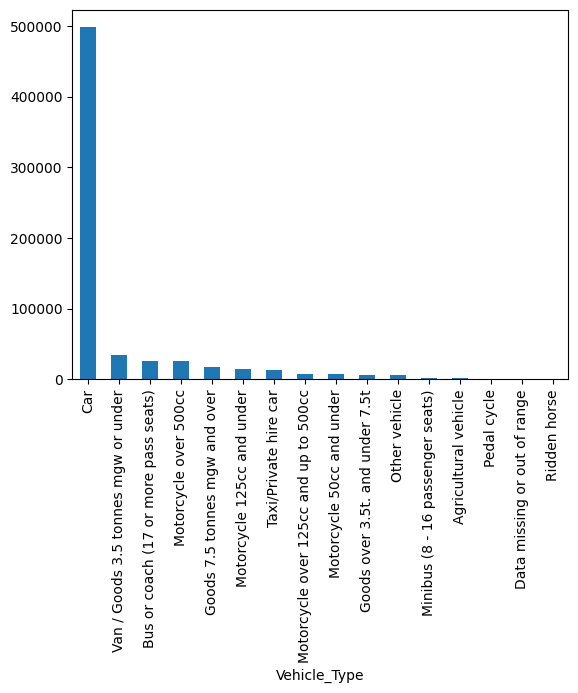

In [29]:
vehicles_involved = accidents['Vehicle_Type']
vehicles_involved_c = accidents['Vehicle_Type'].value_counts()
vehicles_involved_c.plot(kind='bar')
plt.show()

In [30]:
# group by severities and vehicle types
severity_by_vehicle = accidents.groupby(['Vehicle_Type', 'Accident_Severity']).sum().reset_index()
severity_by_vehicle.unstack()

C:\Users\LAB4-StudentPC38\AppData\Local\Temp\ipykernel_4036\909862878.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_by_vehicle = accidents.groupby(['Vehicle_Type', 'Accident_Severity']).sum().reset_index()


TypeError: datetime64 type does not support sum operations

In [ ]:
# severity_by_vehicle.plot(kind='bar')
# plt.show()

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Insights No.
    </span> 
    8 - 10
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>Which road types has the highest number of accidents?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Single carriageways has the most cases of accidents with 492,143 records.
        </span>
    </li>
</ol>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>Which road types are more prone to accidents in certain weather? 
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Single carriageways with fine no high winds weather condition has the most records of accidents, recording 389,830 instances. Goes to show that accidents that are recorded in this part are mostly human/driver error.
        </span>
    </li>
</ol>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>Which road types are more prone to accidents in certain road surface condition? 
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Single carriageways with dry road surface conditions still has the most records of accidents, recording 332,698 instances. Also showing signs of human errors
        </span>
    </li>
</ol>

In [ ]:
accidents.columns

In [ ]:
accidents['Road_Type'].value_counts()

In [ ]:
road_type_weather_cond = accidents.groupby(['Road_Type', 'Weather_Conditions']).size()
road_type_weather_cond.unstack()

In [ ]:
road_type_road_cond = accidents.groupby(['Road_Type', 'Road_Surface_Conditions']).size()
road_type_road_cond.unstack()

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Insights No.
    </span> 
    11
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>What day do the most accidents occur?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Saturdays have the most accidents records with 107,178 cases. It also shows that accidents happen more frequently on weekends.
        </span>
    </li>
</ol>

In [ ]:
accidents.columns

In [ ]:
accidents['Day'] = accidents['Accident Date'].dt.day_name()

In [ ]:
accidents['Day'].value_counts()

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Insights No.
    </span> 
    12 - 15
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>What district in certain days accidents happen more often? And how severe they are?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            On Birmingham, Saturdays, has the most frequent slight accidents, with 1895 instances. Next are Wednesdays with 1849 records. And Thursdays with 1831 records.
        </span>
    </li>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            On Birmingham, Saturdays, has the most frequent serious accidents, with 237 instances. Next are Wednesdays with 230 records. And Sundays with 223 records.
        </span>
    </li>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Still on Birmingham, Both Sundays and Saturdays, has the most frequent fatal accidents, recording at 22 accidents. While Sundays on Highland comes short at 21 instances.
        </span>
    </li>
</ol>

In [ ]:
slight_acc = accidents[accidents['Accident_Severity'] == 'Slight']
serious_acc = accidents[accidents['Accident_Severity'] == 'Serious']
fatal_acc = accidents[accidents['Accident_Severity'] == 'Fatal']

In [ ]:
day_district_sl_accidents = slight_acc.groupby(['Day', 'District Area']).size()
day_district_sl_accidents.sort_values(ascending=False)

In [ ]:
day_district_se_accidents = serious_acc.groupby(['Day', 'District Area']).size()
day_district_se_accidents.sort_values(ascending=False)

In [ ]:
day_district_fa_accidents = fatal_acc.groupby(['Day', 'District Area']).size()
day_district_fa_accidents.sort_values(ascending=False)

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Insights No.
    </span> 
    16
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>Does the time and visibility contribute to those accidents?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Accidents on Daylight are the most common recording 484,880, suggesting that it is mostly cause of human error. Accidents on Darkness with lights lit up are next, with 129,335 instances and Darkness with no lighting recorded 37,437 cases. Goes to show that visibility also contributes to most of the accidents.
        </span>
    </li>
</ol>

In [ ]:
accidents.columns

In [ ]:
accidents['Light_Conditions'].value_counts()

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Insights No.
    </span> 
    17
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>Do bad/worse weather conditions, road surfaces conditions, and light condition contribute to the recorded cases of accidents?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            By analyzing the records, it shows that most accidents happen in suitable/good weather, road surface, and light condition. Not to disregard the other unfavorable recorded accidents. But it revealed that it is mostly just human error.
        </span>
    </li>
</ol>

In [ ]:
accidents.columns

In [ ]:
slight_acc = accidents[accidents['Accident_Severity'] == 'Slight']
serious_acc = accidents[accidents['Accident_Severity'] == 'Serious']
fatal_acc = accidents[accidents['Accident_Severity'] == 'Fatal']

In [ ]:
wc_rsc_lc_slight = slight_acc.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()
# wc_rsc_lc_slight.unstack()
wc_rsc_lc_slight.sort_values(ascending=False)

In [ ]:
wc_rsc_lc_serious = serious_acc.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()
wc_rsc_lc_serious.sort_values(ascending=False)

In [ ]:
wc_rsc_lc_fatal = fatal_acc.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()
wc_rsc_lc_fatal.sort_values(ascending=False)

<h1 style='
    font-weight:700;
    font-size:40px;
    margin-bottom: 20px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>
    <span style='color:#597165;'>
        Insights No.
    </span> 
    18 - 20
</h1>

<!-- to separate the h1  -->
<div style='
    width: auto;
    border-top: 1px solid white;
    '>
</div>

<!-- question -->
<h1 style='
    font-weight:500;
    font-size:30px;
    margin-top: 15px;
    margin-bottom: 15px;
    font-family: "Segoe UI Light";
    letter-spacing: 1px;
    '>What area has the highest accidents recorded by severity and casualties?
</h1>

<!-- answers -->
<ol style='margin-top:10px;'>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Rural Areas is where the most slight accidents happen, recording 140,089 accidents and all of them have 1 casualty.
            <br>
            Analyst note: I can't help but notice that there is an instance where there are 32 casualties in an Urban Area.
        </span>
    </li>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Also in Rural Areas is where the most serious accidents happen, recording 23,181 accidents and all of them have 1 casualty.
            <br>
            Analyst note: I also noticed that there are two instances where there are 27 and 29 casualties in Urban Areas.
        </span>
    </li>
    <li style='
        font-family: "Segoe UI Light";
        font-weight: 500;
        font-size: 20px;
        color: #597165;
        letter-spacing:1px;
        '>
        <span style='color:white;'>
            Lastly, Rural Areas is where the most fatal accidents happen, recording 2704 accidents and all of them have 1 casualty.
        </span>
    </li>
</ol>

In [ ]:
accidents.columns

In [ ]:
slight_acc = accidents[accidents['Accident_Severity'] == 'Slight']
serious_acc = accidents[accidents['Accident_Severity'] == 'Serious']
fatal_acc = accidents[accidents['Accident_Severity'] == 'Fatal']

In [ ]:
slight_acc_area = slight_acc.groupby(['Urban_or_Rural_Area', 'Number_of_Casualties']).size()
slight_acc_area

In [ ]:
serious_acc_area = serious_acc.groupby(['Urban_or_Rural_Area', 'Number_of_Casualties']).size()
serious_acc_area

In [ ]:
fatal_acc_area = fatal_acc.groupby(['Urban_or_Rural_Area', 'Number_of_Casualties']).size()
fatal_acc_area